In [1]:
import librosa
import math
import os
import IPython.display as ipd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pyaudio #Libreria que ayuda para obtener el audio y darle formato
import wave  #Permite leer y escribir archivos wav
import winsound #Permite acceder a la maquinaria básica de reproducción de sonidos proporcionada por la plataformas Windows.
import scipy.io.wavfile as waves #libreria importante para los datos del audio
import numpy as np #libreria importante para arrays y matrices
import matplotlib.pyplot as plt #libreria para graficar resultados
import scipy.fftpack as fourier #libreria para pasar al dominio de la frecuencia de forma sencilla
import time
from datetime import datetime


In [2]:
now = datetime.now()
now.date()

datetime.date(2023, 5, 8)

In [3]:
now.time()

datetime.time(14, 36, 48, 199947)

In [4]:
FechaHora=str(now.day)+"/"+str(now.month)+"/"+str(now.year)+" "+str(now.hour)+":"+str(now.minute)+":"+str(now.second)
print(FechaHora)

8/5/2023 14:36:48


In [5]:
FechaHora

'8/5/2023 14:36:48'

In [6]:
WAVEFORM_path_export = 'waveform'
SPECTROGRAM_path_export='spectogram'
GREYSPECTROGRAM_path_export='grey spectrogram'
MELSPECTROGRAM_path_export='mel spectrogram'
CHROMAGRAM_path_export='chromagram'
MFCC_path_export='mfcc'
DELTA_MFCC_path_export='delta mfccs'
DELTA2_MFCC_path_export='delta2 mfccs'
FvsA_path_export='FrequencyAmplitude'
AMPLITUDEENV_path_export='amplitude envelope'
RMSE_path_export='root mean square energy'
ZCR_path_export='zero croosing rate'
BER_path_export='band energy ratio'
SpecCent_path_export='spectral centroid'
Bandwidth_path_export='bandwidth'
#clip = (r'C:\Users\BHC4SLP\Documents\Python Projects\Proyecto2-GraficaAudio\PruebaAudio1.wav')

In [7]:
duracion=5 #Periodo de grabacion de 5 segundos
archivo="PruebaAudio1.wav" #Se define el nombre del archivo donde se guardara la grabación

audio=pyaudio.PyAudio() #Iniciamos pyaudio

In [8]:
#Abrimos corriente o flujo
stream=audio.open(format=pyaudio.paInt16,channels=2,
					rate=44100,input=True, #rate es la frecuencia de muestreo 44.1KHz
					frames_per_buffer=1024)
					
print("Grabando ...") #Mensaje de que se inicio a grabar
frames=[] #Aqui guardamos la grabacion
for i in range(0,int(44100/1024*duracion)):
	data=stream.read(1024)
	frames.append(data)
	
print("La grabacion ha terminado ") #Mensaje de fin de grabación
stream.stop_stream()    #Detener grabacion
stream.close()          #Cerramos stream
audio.terminate()

Grabando ...
La grabacion ha terminado 


In [9]:
waveFile=wave.open(archivo,'wb') #Creamos nuestro archivo
waveFile.setnchannels(2) #Se designan los canales
waveFile.setsampwidth(audio.get_sample_size(pyaudio.paInt16))
waveFile.setframerate(44100) #Pasamos la frecuencia de muestreo
waveFile.writeframes(b''.join(frames))
waveFile.close() #Cerramos el archivo

In [10]:
clip=(r'C:\Users\BHC4SLP\Documents\Python Projects\Proyecto2-GraficaAudio\PruebaAudio1.wav')
winsound.PlaySound(clip,winsound.SND_FILENAME)

### BASIC INFORMATION OF THE FILE AUDIO

In [11]:
y, sr = librosa.load(clip) 
y.shape

(110080,)

In [12]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [13]:
# total number of samples in audio file
tot_samples = len(y)
tot_samples

110080

In [14]:
# duration of y audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 4.992290249433107 seconds


## Transformada de fourier y amplitud en decibeles

In [15]:
D = librosa.stft(y) # STFT of y 
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) 

[Text(0.5, 1.0, 'WAVEFORM')]

<Figure size 1500x1700 with 0 Axes>

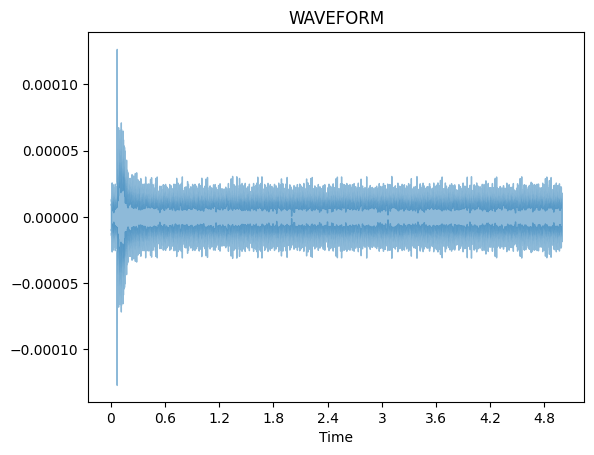

In [16]:
# Simple WAVEFORM to check clip trimming accuracy 
plt.figure(figsize=(15, 17))
fig, ax = plt.subplots() 
img = librosa.display.waveshow(y, sr=sr, axis='time',alpha=0.5) 
ax.set(title='WAVEFORM') 


In [18]:
#The first strips off any trailing slashes, the second gives you the last part of the path.
audio_filename = os.path.basename(os.path.normpath(clip)) 
FechaHora=datetime.now()
FechaHora=FechaHora.replace(microsecond=0)
#FechaHora=str(now.day)+"-"+str(now.month)+"-"+str(now.year)+" "+str(now.hour)+"-"+str(now.minute)+"-"+str(now.second)
image_filename_to_save = str(audio_filename).replace(".wav", "-", 1) + "WAVEFORM " +str(FechaHora).replace(":", "-", 2) +".png"
if not os.path.exists(WAVEFORM_path_export): 
    os.makedirs(WAVEFORM_path_export) 
fig.savefig(os.path.join(WAVEFORM_path_export,image_filename_to_save)) 
plt.close("all")
#str(FechaHora)
#+ str(FechaHora).replace(":", "-", 2)

## Calculating amplitude envelope

In [ ]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)   

In [ ]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [ ]:
# number of frames in amplitude envelope
ae_y = amplitude_envelope(y, FRAME_SIZE, HOP_LENGTH)
len(ae_y)

### Visualizing amplitude envelope

In [ ]:
frames = range(len(ae_y))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

In [ ]:
# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot()
librosa.display.waveshow(y, alpha=0.5)
plt.plot(t, ae_y, color="r")
#plt.ylim((-1, 1))
plt.title("Amplitude envelope")

## Root-mean-squared energy with Librosa


In [ ]:
rms_y = librosa.feature.rms(y=y, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]


## Visualise RMSE + waveform

In [ ]:
frames = range(len(rms_y))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

In [ ]:
# rms energy is graphed in red

plt.figure(figsize=(15, 17))
ax = plt.subplot()
librosa.display.waveshow(y, alpha=0.5)
plt.plot(t, rms_y, color="r")
#plt.ylim((-1, 1))
plt.title("Y")
plt.show()

## Zero-crossing rate with Librosa


In [ ]:
zcr_y = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]


In [ ]:
zcr_y.size

## Visualise zero-crossing rate with Librosa

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(t, zcr_y, color="r")
plt.ylim(0, 1)
plt.show()

## SPECTROGRAM BLACK AND WHITE

In [ ]:
# SPECTROGRAM representation - object-oriented interface 
fig, ax = plt.subplots() 
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax) 
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax, cmap='gray_r') 
ax.set(title='SPECTROGRAM1') 


In [ ]:
#The first strips off any trailing slashes, the second gives you the last part of the path. 
audio_filename = os.path.basename(os.path.normpath(clip)) 
image_filename_to_save = str(audio_filename).replace(".flac", "-", 1) + "GREY SPECTROGRAM.png" 
if not os.path.exists(GREYSPECTROGRAM_path_export): 
    os.makedirs(SPECTROGRAM1_path_export) 
fig.savefig(os.path.join(GREYSPECTROGRAM_path_export,image_filename_to_save)) 
plt.close()

## SPECTROGRAM

In [ ]:
# SPECTROGRAM representation - object-oriented interface 

fig, ax = plt.subplots() 
#img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax) 
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax) 
ax.set(title='SPECTROGRAM') 
#fig.colorbar()


In [ ]:
#The first strips off any trailing slashes, the second gives you the last part of the path. 
audio_filename = os.path.basename(os.path.normpath(clip)) 
image_filename_to_save = str(audio_filename).replace(".flac", "-", 1) + "SPECTROGRAM.png" 
if not os.path.exists(SPECTROGRAM_path_export): 
    os.makedirs(SPECTROGRAM_path_export) 
fig.savefig(os.path.join(SPECTROGRAM_path_export,image_filename_to_save)) 
plt.close()

## MEL SPECTROGRAM

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=90)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

In [ ]:
plt.figure(figsize=(25, 10))
fig, ax = plt.subplots() 
img=librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
ax.set(title='MEL SPECTROGRAM') 

In [ ]:
#The first strips off any trailing slashes, the second gives you the last part of the path. 
audio_filename = os.path.basename(os.path.normpath(clip)) 
image_filename_to_save = str(audio_filename).replace(".flac", "-", 1) + "MEL SPECTROGRAM.png" 
if not os.path.exists(MELSPECTROGRAM_path_export): 
    os.makedirs(MELSPECTROGRAM_path_export) 
fig.savefig(os.path.join(MELSPECTROGRAM_path_export,image_filename_to_save)) 
plt.close()

## CHROMAGRAM

In [ ]:
#CHROMAGRAM representation - object-oriented interface 
CHROMAGRAM = librosa.feature.chroma_cqt(y=y, sr=sr) 
fig, ax = plt.subplots() 
img = librosa.display.specshow(CHROMAGRAM, y_axis='chroma', x_axis='time', ax=ax) 
ax.set(title='CHROMAGRAM') 


In [ ]:
audio_filename = os.path.basename(os.path.normpath(clip)) 
image_filename_to_save = str(audio_filename).replace(".flac", "-", 1) + "CHROMAGRAM.png" 
if not os.path.exists(CHROMAGRAM_path_export): 
    os.makedirs(CHROMAGRAM_path_export) 
fig.savefig(os.path.join(CHROMAGRAM_path_export,image_filename_to_save)) 
plt.close()

## MFCCs

In [ ]:
#MFCC representation - object-oriented interface 
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=1200) 
fig, ax = plt.subplots() 
img = librosa.display.specshow(mfccs, x_axis='time') 
ax.set(title='Mel-frequency cepstral coefficients (MFCCs)') 

In [ ]:
audio_filename = os.path.basename(os.path.normpath(clip)) 
image_filename_to_save = str(audio_filename).replace(".flac", "-", 1) + "MFCC.png" 
if not os.path.exists(MFCC_path_export): 
    os.makedirs(MFCC_path_export) 
fig.savefig(os.path.join(MFCC_path_export,image_filename_to_save)) 
plt.close()

In [ ]:
HOP_SIZE=512
y_spec = librosa.stft(y, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [ ]:
def calculate_split_frequency_bin(split_frequency, sample_rate, num_frequency_bins):
    """Infer the frequency bin associated to a given split frequency."""
    
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / num_frequency_bins
    split_frequency_bin = math.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)

In [ ]:
split_frequency_bin = calculate_split_frequency_bin(2000, 22050, 1025)
split_frequency_bin

In [ ]:
def band_energy_ratio(spectrogram, split_frequency, sample_rate):
    """Calculate band energy ratio with a given split frequency."""
    
    split_frequency_bin = calculate_split_frequency_bin(split_frequency, sample_rate, len(spectrogram[0]))
    band_energy_ratio = []
    
    # calculate power spectrogram
    power_spectrogram = np.abs(spectrogram) ** 2
    power_spectrogram = power_spectrogram.T
    
    # calculate BER value for each frame
    for frame in power_spectrogram:
        sum_power_low_frequencies = frame[:split_frequency_bin].sum()
        sum_power_high_frequencies = frame[split_frequency_bin:].sum()
        band_energy_ratio_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(band_energy_ratio_current_frame)
    
    return np.array(band_energy_ratio)

In [ ]:
ber_y = band_energy_ratio(y_spec, 2000, sr)


In [ ]:
len(ber_y)

## Visualise Band Energy Ratio

In [ ]:
frames = range(len(ber_y))
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)

In [ ]:
plt.figure(figsize=(25, 10))

plt.plot(t, ber_y, color="b")
#plt.ylim((0, 200))
plt.show()

## Spectral Centroid

In [ ]:
sc_y = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]


In [ ]:
sc_y.shape

## Visualising spectral centroid

In [ ]:
len(t)

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(t, sc_y, color='b')
plt.show()

## Spectral bandwidth with Librosa

In [ ]:
ban_y = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
ban_y.shape

## Visualising spectral bandwidth

In [ ]:
plt.figure(figsize=(25,10))

plt.plot(t, ban_y, color='b')
plt.show()